# Library Scipy

## Cityblock

In [2]:
from scipy.spatial.distance import cityblock

In [3]:
cityblock([1], [0])

1

In [4]:
cityblock([1, 2], [0, 0])

3

In [6]:
cityblock([1, 2, 3], [-1, 0, -1])

8

## ConvexHull y QhullError

In [31]:
from scipy.spatial import ConvexHull
from scipy.spatial.qhull import QhullError
from models import Vector
import operator

In [32]:
def convex_hull(vectors: set) -> list:
    """
    :param vectors: |vectors| >= 3
        if |vectors| < 3, then return the vectors
    :return:
    """

    # Convert to list to make it indexable
    vectors = list(vectors)

    if len(vectors) >= 3:

        try:
            hull = ConvexHull(vectors, incremental=False)
            vectors = list(operator.itemgetter(*hull.vertices)(vectors))
        except QhullError as e:
            # Expected error
            pass

    return vectors

In [33]:
vectors = set(map(
    Vector,
    [
        [-1, 0, 0], [2, 3, 2], [1, 1, 1], [3, 3, 3], [0, 0, 0], [2, 2, 2], [3, 4, 5]
    ]
))

In [34]:
convex_hull(vectors)

[array([3, 3, 3]),
 array([3, 4, 5]),
 array([2, 3, 2]),
 array([0, 0, 0]),
 array([-1,  0,  0])]

# Pygmo

In [44]:
import pygmo as pg
from models import Vector

In [45]:
vectors = set(map(
    Vector,
    [
        [-1, 0, 0], [2, 3, 2], [1, 1, 1], [3, 3, 3], [0, 0, 0], [2, 2, 2], [3, 4, 5]
    ]
))

In [46]:
reference = Vector((-2, -1, -1))

In [47]:
def calc_hypervolume(vectors: list, reference: Vector) -> float:
    """
    By default, the pygmo library is used for minimization problems.
    In our case, we need it to work for maximization problems.
    :param vectors: List of vectors limits of hypervolume
    :param reference: Reference vector to calc hypervolume
    :return: hypervolume area.
    """
    # Multiply by -1, to convert maximize problem into minimize problem.
    return pg.hypervolume([v.components * -1 for v in vectors]).compute(reference.components * -1)

In [48]:
calc_hypervolume(vectors=vectors, reference=reference)

150.0

# NumPy

In [60]:
import numpy as np

In [61]:
class Vector:
    def __init__(self, components):
        """
        Vector'state init
        :param components: a numpy array, list or tuple of dtype items
        """
        self.components = np.array(components)

    def __str__(self):
        """
        Return a string representation of the train_data in an array.
        :return:
        """
        return np.array_str(self.components)
    
    def __add__(self, other):
        """
        This method has four options:
            - A vector of same length has been given, return a new Vector with the sum of each pair of components.
            - A vector of different length has been given, throws an exception.
            - A int, sum that int of each component.
            - A float, sum that number as float, and remove decimals.
        :param other:
        :return:
        """

        if isinstance(other, Vector):
            return self.__class__(self.components + other.components)
        else:
            return self.__class__(self.components + other)

In [62]:
str(Vector((1, 1, 1)) + Vector((2, 2, 2)))

'[3 3 3]'

# Matplotlib

In [71]:
import matplotlib.pyplot as plt

In [72]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 2, 3, 4, 5, 6]

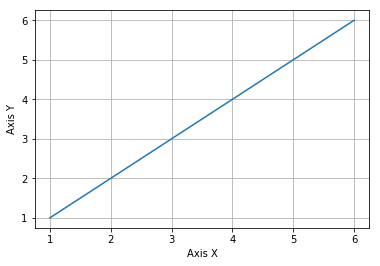

In [73]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set(
    xlabel='Axis X',
    ylabel='Axis Y'
)

plt.show()

# Gym

In [76]:
import gym
from environments import DeepSeaTreasure

## Gym example

In [75]:
env = gym.make('CartPole-v0') # Instance of environment

env.reset() # Reset environment

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())
    
env.close()

C:\Anaconda3\envs\tfm\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## Own environment

In [78]:
env = DeepSeaTreasure() # Instance of environment

env.reset() # Reset environment

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())

env.close()

| ☺ |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

| ☺ |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| ☺ |   |   |   |   

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 | ☺ |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   | ☺ |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 | ☺ |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | ☺ |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 

| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | ☺ | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | ☺ | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   | ☺ |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   | ☺ |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   | ☺ |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   | ☺ |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | 

| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   | ☺ |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   | ☺ |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   | ☺ |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   | ☺ |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   | ☺ |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   | ☺ |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |

| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   | ☺ |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   | ☺ |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   

| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   | ☺ |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

| ☺ |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| ☺ |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   | ☺ |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   | ☺ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   | ☺ |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   | ☺ |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   | ☺ |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   | ☺ |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   | ☺ |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   | ☺ |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | ☺ |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | ☺ |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■

| ■ | 2 |   | ☺ |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   | ☺ |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   | ☺ |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   

| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   | ☺ |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ 

|   |   |   |   |   |   |   | ☺ |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   | ☺ |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   

| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   | ☺ |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   | ☺ |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

| ☺ |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| ☺ |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   | ☺ |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   | ☺ |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 

| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   | ☺ |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   | ☺ |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 

| 1 |   |   |   | ☺ |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   | ☺ |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■

| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | ☺ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | ☺ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ |

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 | ☺ |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | ☺ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   | ☺ |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 | ☺ |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |

| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   | ☺ |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   | ☺ |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ 

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ☺ | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ☺ | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | 

| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   

| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   | ☺ |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   | ☺ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |

| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 | 16 |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   | ☺ |
| ■ | ■ | ■ | ■ | ■ | ■ |   |   |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | 24 | 50 |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ |   |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 74 |   |
| ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | ■ | 124 |

|   |   |   |   |   |   |   |   |   |   |
| 1 |   |   |   |   |   |   |   |   |   |
| ■ | 2 |   |   |   |   |   |   |   |   |
| ■ | ■ | 3 |   |   |   |   |   |   |   |
| ■ | ■ | ■ | 5 | 8 

# PyYAML

In [128]:
import yaml
from pathlib import Path

In [129]:
def structures_to_yaml(data, level: int = 0) -> str:
    result = ''

    for k, v in sorted(data.items(), key=lambda x: x[0]):
        if isinstance(v, dict):
            result += ' ' * (level * 2) + "{}:\n".format(k) + structures_to_yaml(data=v, level=level + 1)
        else:
            result += ' ' * (level * 2) + "{}: {}\n".format(k, v)

    return result

In [130]:
data = {
    '1_level': {
        '2_level': {
            '3_level': [[1, 2, 3], [2, [1, 2], 2]]
        }
    }
}

In [131]:
data

{'1_level': {'2_level': {'3_level': [[1, 2, 3], [2, [1, 2], 2]]}}}

In [132]:
with Path('./sample.yml').open(mode='w+', encoding='UTF-8') as f:
    f.write(structures_to_yaml(data=data))

In [133]:
!more sample.yml

1_level:
  2_level:
    3_level: [[1, 2, 3], [2, [1, 2], 2]]


In [134]:
data_loaded = yaml.load(Path('./sample.yml').open(mode='r', encoding='UTF-8'), Loader=yaml.FullLoader)

In [135]:
data_loaded

{'1_level': {'2_level': {'3_level': [[1, 2, 3], [2, [1, 2], 2]]}}}

# Pickle

In [157]:
import pickle
from typing import Any
from pathlib import Path
from models import Vector

In [158]:
def binary_save(path: Path, model: Any) -> None:
    """
    Dump model given in path given
    :param path:
    :param model:
    :return:
    """
    # If any parents doesn't exist, make it.
    path.parent.mkdir(parents=True, exist_ok=True)

    with path.open(mode='wb+') as f:
        pickle.dump(model, f)

In [159]:
def binary_load(path: Path) -> Any:
    """
    Load a model from path given
    :param path:
    :return:
    """
    with path.open(mode='rb') as f:
        return pickle.load(f)

In [160]:
Vector = ([0, 0, 0]) # Initial state

In [161]:
binary_save(Path('./vector.bin'), Vector) # Save model

In [162]:
Vector[0] = 1
Vector

[1, 0, 0]

In [163]:
binary_load(Path('./vector.bin')) # Before change

[0, 0, 0]